# Load the dataset into the tool

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [48]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [49]:
Age=1.5+df.Rings
df["Age"]=Age
df=df.drop(columns=["Rings"],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Data Visualistion
*Univariate* *analysis*

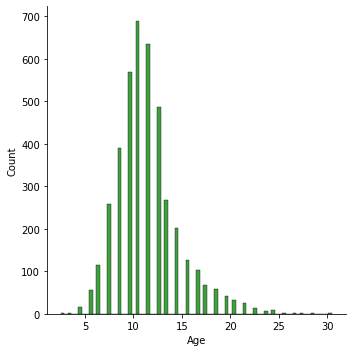

In [6]:
sns.displot(df["Age"], color='green')

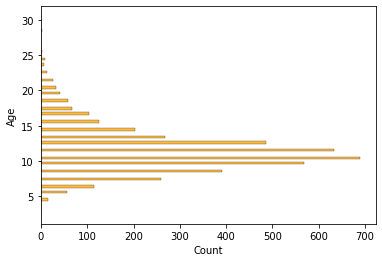

In [10]:
sns.histplot(y=df.Age,color='orange')

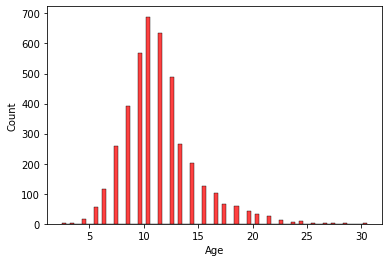

In [11]:
sns.histplot(x=df.Age,color='red')


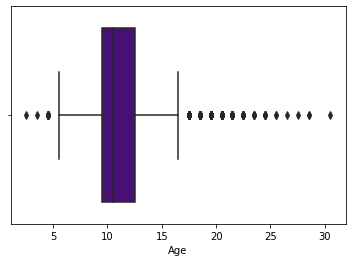

In [15]:
sns.boxplot(x=df.Age,color='indigo')

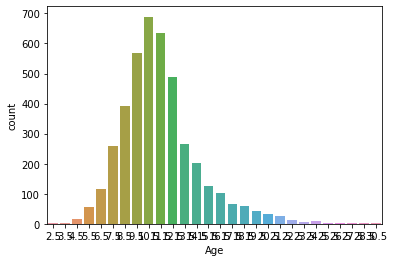

In [16]:
sns.countplot(x=df.Age)


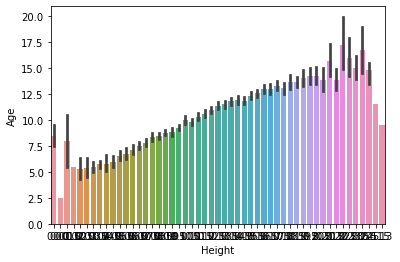

In [17]:
sns.barplot(x=df.Height,y=df.Age)


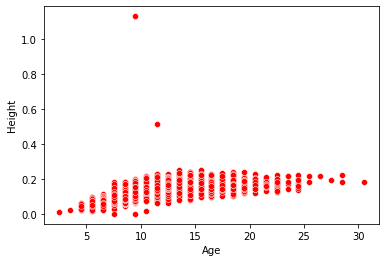

In [18]:
sns.scatterplot(x=df.Age,y=df.Height,color='red')


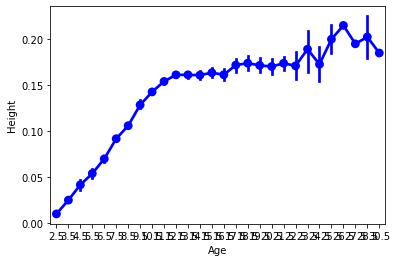

In [19]:
sns.pointplot(x=df.Age, y=df.Height, color="blue")


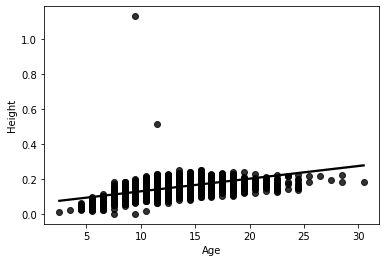

In [20]:
sns.regplot(x=df.Age,y=df.Height,color='black')


**Multi-Variate Analysis**

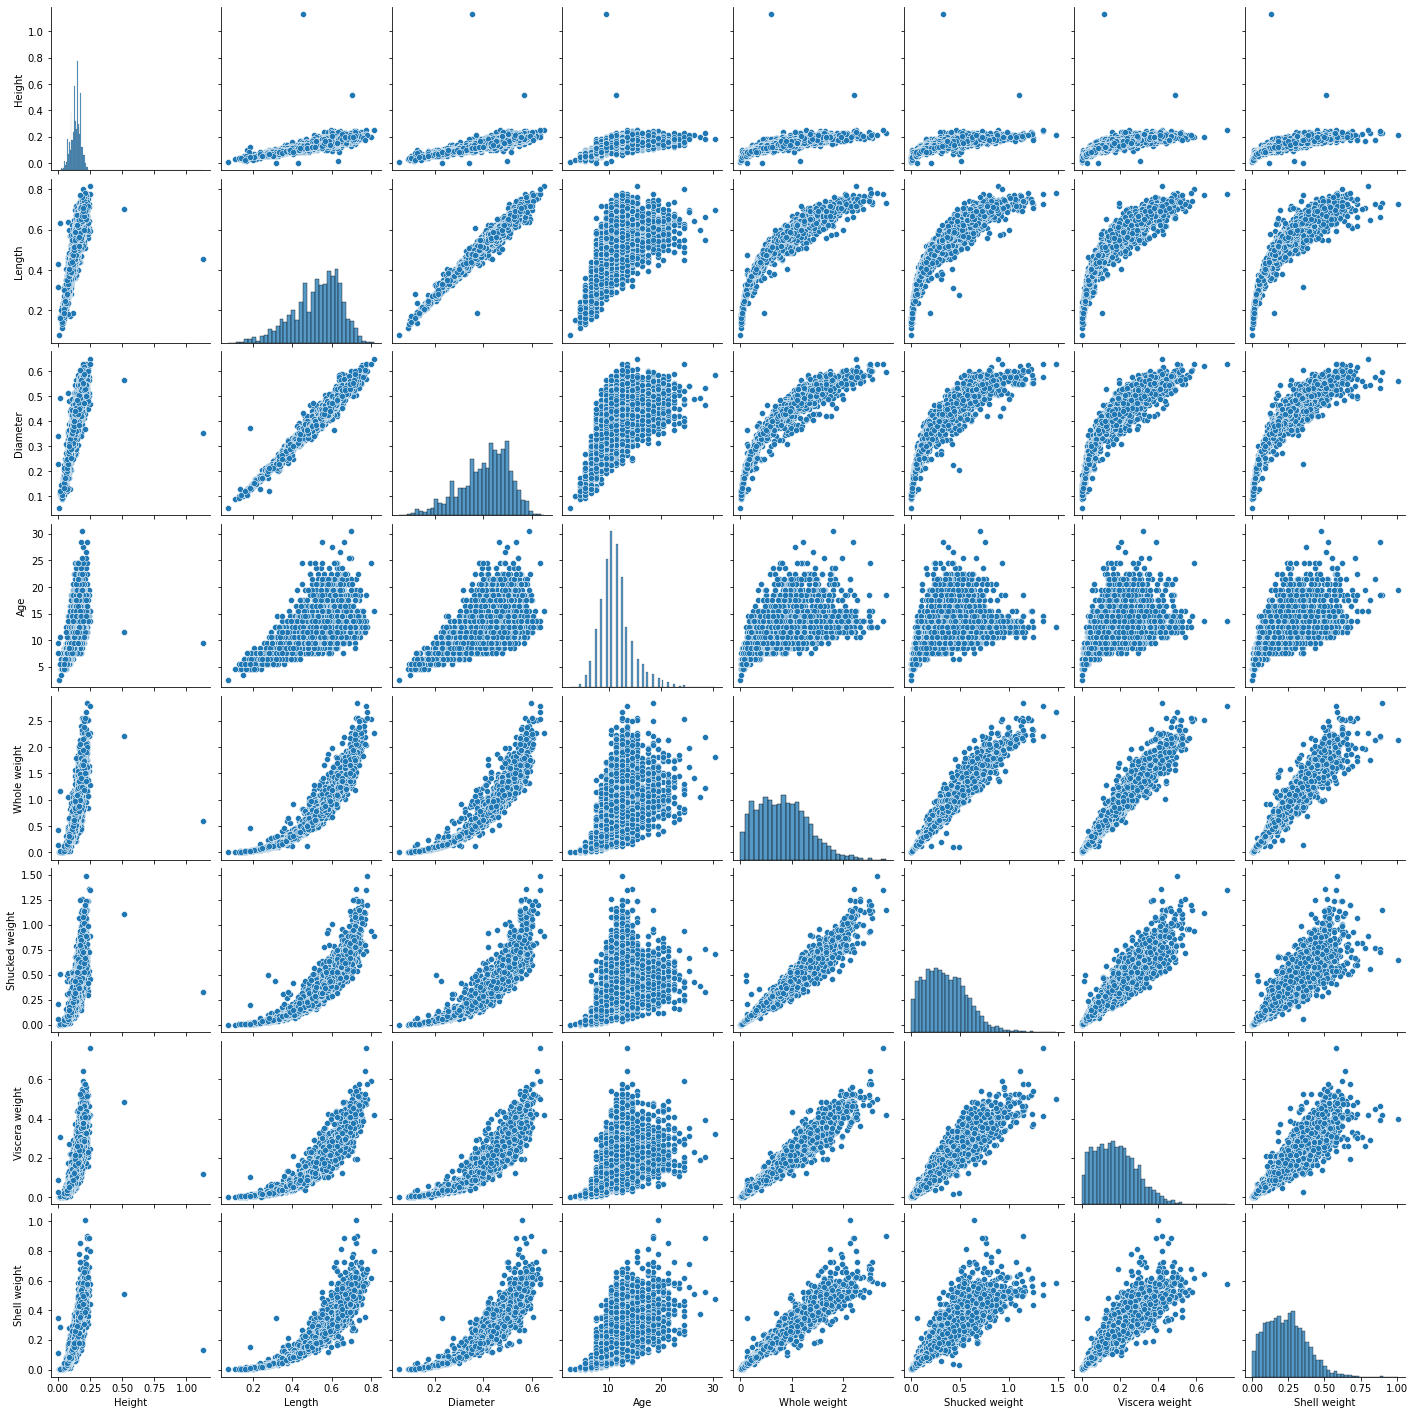

In [21]:
sns.pairplot(data=df[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]])


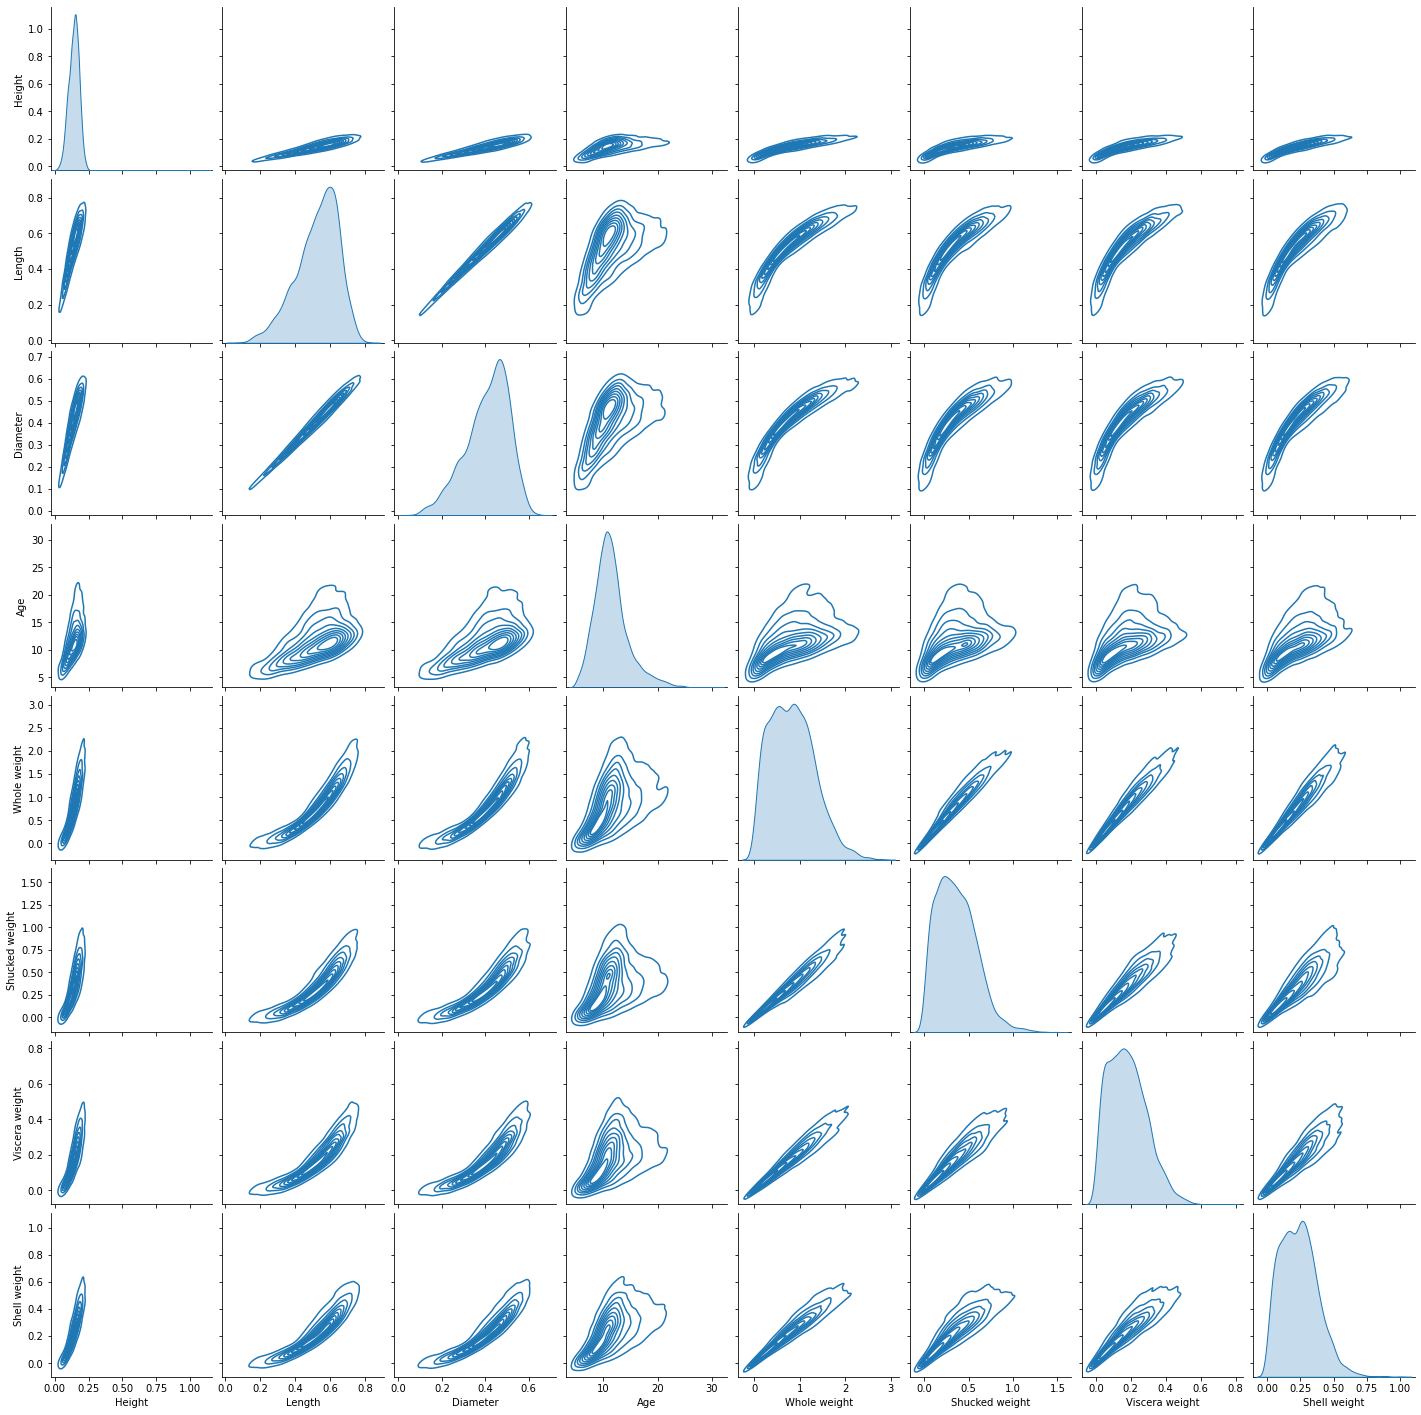

In [46]:
sns.pairplot(data=df[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]],kind="kde")


*Check for Missing values and deal with them*

In [23]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

*Find the outliers and replace them outliers*

In [24]:
outliers=df.quantile(q=(0.25,0.75))
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [25]:
a = df.Age.quantile(0.25)
b = df.Age.quantile(0.75)
c = b - a
lower_limit = a - 1.5 * c
df.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

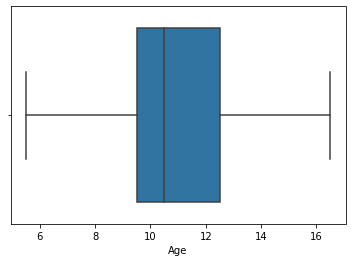

In [26]:
df['Age'] = np.where(df['Age'] < lower_limit, 7, df['Age'])
sns.boxplot(x=df.Age,showfliers = False)

*Check for Categorical columns and perform encoding*

In [27]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [28]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
df.Sex = lab.fit_transform(df.Sex)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


*Split the data into dependent and independent variables*

In [29]:
y = df["Sex"]
y.head()
x=df.drop(columns=["Sex"],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


*Scale the independent variables*

In [30]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


*Split the data into training and testing*

In [31]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [32]:
X_Train.shape,X_Test.shape

((3341, 8), (836, 8))

In [33]:
Y_Train.shape,Y_Test.shape


((3341,), (836,))

In [34]:
X_Train.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
3141,-2.864726,-2.750043,-1.423087,-1.622870,-1.553902,-1.583867,-1.644065,-1.543234
3521,-2.573250,-2.598876,-2.020857,-1.606554,-1.551650,-1.565619,-1.626104,-1.387181
883,1.132658,1.230689,0.728888,1.145672,1.041436,0.286552,1.538726,1.577830
3627,1.590691,1.180300,1.446213,2.164373,2.661269,2.330326,1.377072,0.017298
2106,0.591345,0.474853,0.370226,0.432887,0.255175,0.272866,0.906479,1.265723


In [35]:
Y_Train.head()


3141    1
3521    1
883     2
3627    2
2106    2
Name: Sex, dtype: int64

In [36]:
Y_Test.head()


668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int64

*Build the Model*

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [39]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [40]:
y_predict = model.predict(X_Test)

In [41]:
y_predict_train = model.predict(X_Train)

*Train and test the Model*

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.9835378629152948


In [43]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5358851674641149


*Measure the performance using Metrics*


In [44]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,117,33,99
1,33,218,40
2,120,63,113


In [45]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45       249
           1       0.69      0.75      0.72       291
           2       0.45      0.38      0.41       296

    accuracy                           0.54       836
   macro avg       0.53      0.53      0.53       836
weighted avg       0.53      0.54      0.53       836

